# Data Preparation

### Some of the data preparation topics include: <br>
* Data cleaning: Handling missing values, dealing with outliers, and correcting data errors. <br><br>
* Data transformation: Normalization, standardization, log-transformations, scaling. <br><br>
* Data encoding: Converting categorical variables into numerical representations. <br><br>
* Handling date and time data: Extracting meaningful information from dates and times. <br><br>
* Text data preprocessing: Cleaning and preprocessing text data for natural language processing (NLP) tasks. <br><br>
* Data integration: Combining data from multiple sources into a single dataset. <br><br>
* Data normalization: Bringing all features to a similar scale to avoid bias. <br><br>
* Handling noisy data: Techniques to reduce noise and improve data quality.<br><br>
* Handling duplicates: Identifying and removing duplicate records in a dataset.<br><br>
* Data discretization: Converting continuous variables into discrete intervals.<br><br>
* Handling skewed data: Techniques to address skewed distributions.<br><br>
* Data sampling: Techniques for selecting representative subsets of data.<br><br>
* Data splitting: Dividing data into training, validation, and testing sets.<br><br>
* Data aggregation: Combining data at a higher level of granularity.<br><br>
* Handling time series data: Techniques for analyzing and preprocessing time-dependent data.<br><br>

## Data encoding

#### Quantize the values: 
* string to integers
* Date to days
* Event numbers,….

#### To be able to use the data for mathematical machine learning algorithms
#### Approaches:
* Map every string to a number,
* One-hot encoding,

# Mapping to a value
For example, in NVD cve vulnerability dataset, you can map attack_complexity values to a numbers


In [1]:
import pandas as pd
df= pd.read_csv("C:/Users/hussein4/OneDrive - Sheridan College/Desktop/Summer 2024/Advanced Topics in Informatoin Security/Lecture Notes/Week2/nvd_cve_2022.csv")

In [2]:
df['attack_complexity'].unique()

array(['LOW', 'HIGH', nan], dtype=object)

In [3]:
#create mapping dictionary
mapping={'HIGH':1,'LOW':2}

#Using the map method
df['attack_complexity']=df['attack_complexity'].map(mapping)

# One-hot encoding


* One-hot encoding is a technique used to represent categorical variables as binary vectors. <br><br>
* One-hot encoding transforms each categorical variable into a new set of binary variables, where each variable represents a unique category from the original variable. The process involves creating new binary variables (often referred to as dummy variables) equal to the number of unique categories in the original variable.<br><br>
* One-hot encoding allows machine learning algorithms to understand and effectively use categorical data. It ensures that the categorical variables are encoded in a format that captures the categorical information without imposing an arbitrary numerical order or magnitude on the categories.<br><br>

* Here's an example to illustrate the concept. Let's say we have a categorical variable "Color" with three categories: Red, Green, and Blue.<br><br>
* After applying one-hot encoding, the variable would be transformed into three binary variables: "Color_Red," "Color_Green," and "Color_Blue." <br><br>
* The value of each binary variable indicates whether a specific category is present for each observation. <br><br>
* For example, if an observation originally had the color "Red," the variables "Color_Red" would be 1, while "Color_Green" and "Color_Blue" would be 0.<br><br>


In [4]:
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df['Color'], prefix='Color')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Display the encoded DataFrame
print(df)


   Color  Color_Blue  Color_Green  Color_Red
0    Red           0            0          1
1  Green           0            1          0
2   Blue           1            0          0
3  Green           0            1          0
4    Red           0            0          1


In [5]:
import pandas as pd

# Sample data
data = {'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']}
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df['Color'])
df_encoded = df_encoded.idxmax(axis=1).astype('category').cat.codes.rename('Color_Encoded')

# Concatenate the encoded column with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Display the encoded DataFrame
print(df)


   Color  Color_Encoded
0    Red              2
1  Green              1
2   Blue              0
3  Green              1
4    Red              2


In [6]:
cve_df= pd.read_csv("C:/Users/hussein4/OneDrive - Sheridan College/Desktop/Summer 2024/Advanced Topics in Informatoin Security/Lecture Notes/Week2/nvd_cve_2022.csv")

In [7]:
cve_df.head()

,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date
0,0,CVE-2022-0001,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,LOW,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11T18:15Z,2022-08-19T12:28Z
1,1,CVE-2022-0002,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,LOW,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11T18:15Z,2022-08-19T12:28Z
2,2,CVE-2022-0004,['Hardware debug modes and processor INIT sett...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:core_i3-12100_firmware:*:*:*...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,LOW,HIGH,HIGH,HIGH,NONE,6.8,MEDIUM,0.9,5.9,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12T17:15Z,2022-06-10T20:52Z
3,3,CVE-2022-0005,['Sensitive information accessible by physical...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:celeron_g5205u_firmware:-:*:...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,LOW,LOW,NONE,NONE,NONE,2.4,LOW,0.9,1.4,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12T17:15Z,2022-06-01T17:04Z
4,4,CVE-2022-0011,['PAN-OS software provides options to exclude ...,['https://security.paloaltonetworks.com/CVE-20...,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,LOW,NONE,HIGH,NONE,LOW,6.5,MEDIUM,2.8,3.6,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-02-10T18:15Z,2022-02-17T13:41Z


### <p style=color:red> Exercise 1: Use one-hot to quantize the value of attack_complexity in nvd vulnerability dataset.


# Fill in missing values with mean 

* Whenever the value of a variable (feature/ column ) in a dataset is not provided. <br> 
* In the Pandas dataframe it is usually represented as NAN or null.<br> 
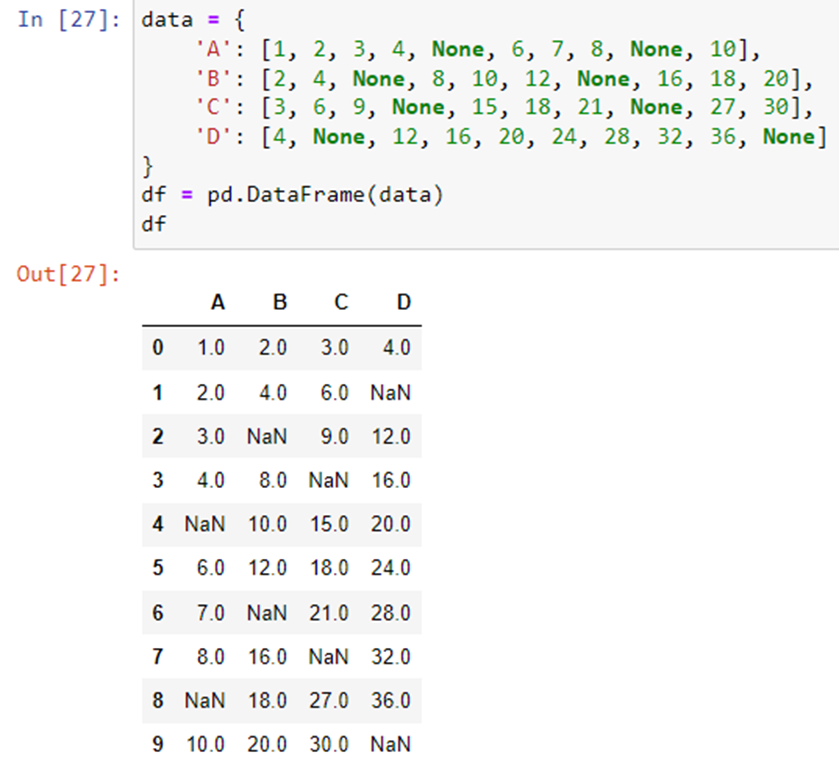
<br> 

## How to handle missing values?

* Drop the rows with missing values
* May end up dropping a large number of rows (which in fact represent an object or an event)  <br> 
dataframe.dropna()<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html <br><br>
* Replace the missing values with an imputed value: an estimated value


## Mean/median Imputation

* Replace missing values with the mean or median of the available values in the same column. <br>
* This approach assumes that the missing values are missing at random and that the mean or median is a representative value for the variable.<br>
* Find rows with missing values:
	**missing_rows = cve_df[cve_df['column_name'].isnull()]**
* Fill in the missing values with mean
	**mean_value = df['column_name'].mean()**
    **df['column_name'].fillna(mean_value, inplace=True)**

In [10]:
cve_df['base_score'].mean()

7.1846642508834755

In [11]:
cve_df[cve_df['base_score'].isnull()]

,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date,base_severity_one-hot
116,116,CVE-2022-0177,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-01-24T21:15Z,2022-01-28T15:15Z,0
163,163,CVE-2022-0227,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-02-04T23:15Z,2022-04-04T12:15Z,0
194,194,CVE-2022-0259,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-01-04T14:15Z,2023-01-04T14:15Z,0
258,258,CVE-2022-0329,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-01-21T11:15Z,2022-02-02T21:15Z,0
417,417,CVE-2022-0498,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2022-02-04T23:15Z,2022-02-04T23:15Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22858,22858,CVE-2022-48313,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22859,22859,CVE-2022-48314,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22930,22930,CVE-2022-48437,['An issue was discovered in x509/x509_verify....,['https://ftp.openbsd.org/pub/OpenBSD/LibreSSL...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-04-12T05:15Z,2023-04-12T12:44Z,0
22934,22934,CVE-2022-48468,['protobuf-c before 1.4.1 has an unsigned inte...,['https://github.com/protobuf-c/protobuf-c/iss...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],2023-04-13T21:15Z,2023-04-14T13:06Z,0


### <p style=color:red> Exercise 2: Fill the missing base_score of NVD vulnerabilities with the mean value. After filling the missing values, check if there is missing values left.

## Fill in missing values with mode (most frequent value)
Replace missing categorical values with the mode (most frequent value) of the available values in the same column. 
This approach is suitable for categorical variables.

Assuming you have a dataframe named 'df' and a column named 'column_name' with missing values

Calculate the mode of the column
**mode_value = df['column_name'].mode()**

Fill missing values with the mode
**df['column_name'].fillna(mode_value, inplace=True)**


In [14]:
cve_df['exploitability_score'].mode()

0    3.9
Name: exploitability_score, dtype: float64

In [15]:
# find missing rows with missing value in column 'exploitability_score'
missing_rows = cve_df[cve_df['exploitability_score'].isnull()]

In [16]:
missing_rows

,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date,base_severity_one-hot
116,116,CVE-2022-0177,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2022-01-24T21:15Z,2022-01-28T15:15Z,0
163,163,CVE-2022-0227,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2022-02-04T23:15Z,2022-04-04T12:15Z,0
194,194,CVE-2022-0259,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2023-01-04T14:15Z,2023-01-04T14:15Z,0
258,258,CVE-2022-0329,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2022-01-21T11:15Z,2022-02-02T21:15Z,0
417,417,CVE-2022-0498,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2022-02-04T23:15Z,2022-02-04T23:15Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22858,22858,CVE-2022-48313,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22859,22859,CVE-2022-48314,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22930,22930,CVE-2022-48437,['An issue was discovered in x509/x509_verify....,['https://ftp.openbsd.org/pub/OpenBSD/LibreSSL...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2023-04-12T05:15Z,2023-04-12T12:44Z,0
22934,22934,CVE-2022-48468,['protobuf-c before 1.4.1 has an unsigned inte...,['https://github.com/protobuf-c/protobuf-c/iss...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,NaN,NaN,[],2023-04-13T21:15Z,2023-04-14T13:06Z,0


### <p style=color:red> Exercise 3: fillin the missing exploitability_score of NVD vulnerabilities with the mode value. After filling in the missing values, check if there is missing values left

# Missing values: KNN imputer


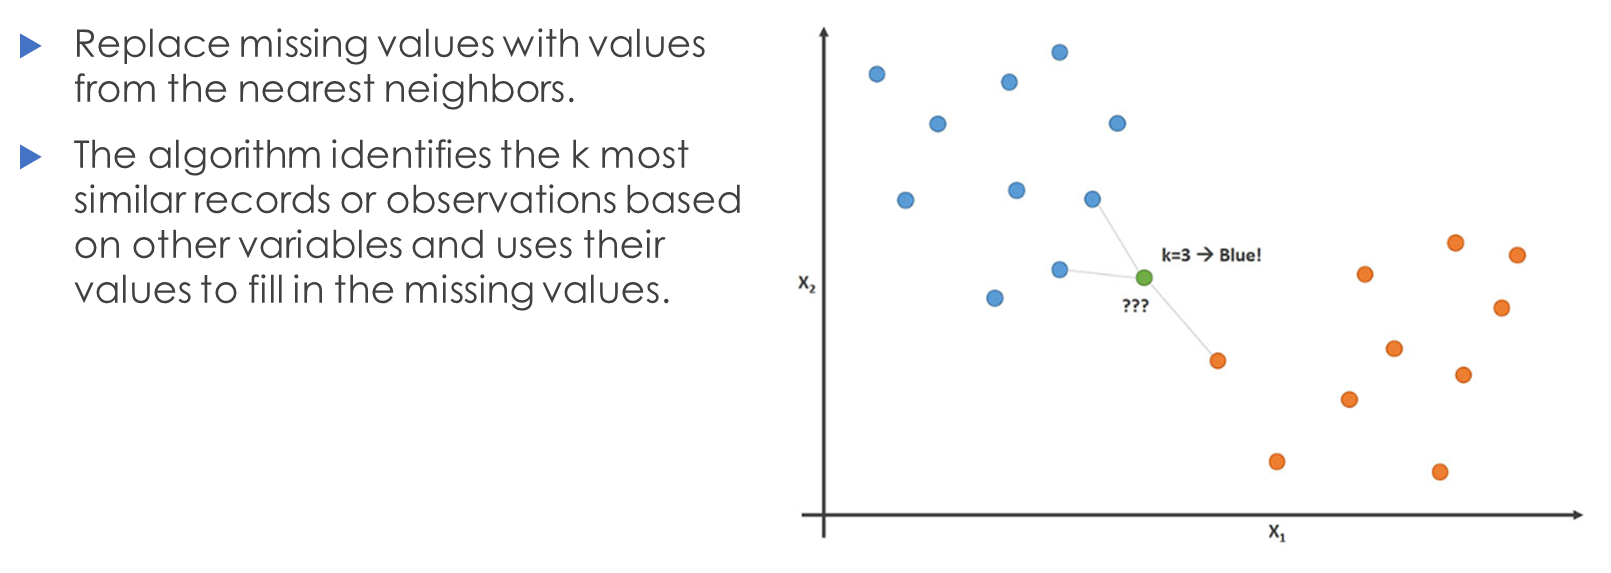



* Assuming you have a dataframe named 'df' and a column named 'column_name' with missing values

* Create a copy of the dataframe
 **df_imputed = df.copy()**

* Initialize the KNNImputer with the desired number of neighbors
 **knn_imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed**

* Perform K-nearest neighbors imputation on the specific column
 **df_imputed['column_name'] = knn_imputer.fit_transform(df[['column_name']])**

* Note: KNNImputer returns a numpy array, so we need to assign it back to the column in the dataframe

* Print the imputed dataframe
 **print(df_imputed)**


In [19]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # Adjust the number of neighbors as needed


C:\Users\hussein4\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
cve_df[cve_df['attack_complexity'].isnull()]

,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date,base_severity_one-hot
116,116,CVE-2022-0177,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2022-01-24T21:15Z,2022-01-28T15:15Z,0
163,163,CVE-2022-0227,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2022-02-04T23:15Z,2022-04-04T12:15Z,0
194,194,CVE-2022-0259,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2023-01-04T14:15Z,2023-01-04T14:15Z,0
258,258,CVE-2022-0329,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2022-01-21T11:15Z,2022-02-02T21:15Z,0
417,417,CVE-2022-0498,['** REJECT ** DO NOT USE THIS CANDIDATE NUMBE...,[],[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2022-02-04T23:15Z,2022-02-04T23:15Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22858,22858,CVE-2022-48313,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22859,22859,CVE-2022-48314,['The Bluetooth module has a vulnerability of ...,['https://device.harmonyos.com/en/docs/securit...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2023-04-16T08:15Z,2023-04-17T13:12Z,0
22930,22930,CVE-2022-48437,['An issue was discovered in x509/x509_verify....,['https://ftp.openbsd.org/pub/OpenBSD/LibreSSL...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2023-04-12T05:15Z,2023-04-12T12:44Z,0
22934,22934,CVE-2022-48468,['protobuf-c before 1.4.1 has an unsigned inte...,['https://github.com/protobuf-c/protobuf-c/iss...,[],NaN,NaN,NaN,NaN,NaN,NaN,7.184664,NaN,3.9,NaN,[],2023-04-13T21:15Z,2023-04-14T13:06Z,0


### <p style=color:red> Excercise 4: filling in the missing attack_complexity of NVD vulnerabilities with the KNN value. Note you first need to quantize the attack_complexity. you can use the result of exercise 1.


# Missing variables: Regression imputation: 
Predict missing values using regression models based on other variables. Missing values are treated as the dependent variable, and the other variables are used as predictors to estimate the missing values.



# Other approaches
* Hot-deck imputation: Replace missing values with values randomly selected from similar records or observations in the same dataset. This approach maintains the statistical properties of the original dataset.<br>
* Multiple imputation: Generate multiple imputations by creating multiple plausible values for each missing entry. Multiple imputation takes into account the uncertainty associated with missing values and provides a range of plausible values for analysis.<br>
* Domain-specific imputation: Use domain knowledge or expert input to impute missing values based on specific characteristics or patterns in the data.<br>


In [25]:
data = {
    'A': [1, 2, 3, 4, None, 6, 7, 8, None, 10],
    'B': [2, 4, None, 8, 10, 12, None, 16, 18, 20],
    'C': [3, 6, 9, None, 15, 18, 21, None, 27, 30],
    'D': [4, None, 12, 16, 20, 24, 28, 32, 36, None]
}
df = pd.DataFrame(data)
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,2.0,4.0,6.0,NaN
2,3.0,NaN,9.0,12.0
3,4.0,8.0,NaN,16.0
4,NaN,10.0,15.0,20.0
5,6.0,12.0,18.0,24.0
6,7.0,NaN,21.0,28.0
7,8.0,16.0,NaN,32.0
8,NaN,18.0,27.0,36.0
9,10.0,20.0,30.0,NaN


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# Create a sample dataframe
data = {
    'A': [1, 2, 3, 4, None, 6, 7, 8, None, 10],
    'B': [2, 4, None, 8, 10, 12, None, 16, 18, 20],
    'C': [3, 6, 9, None, 15, 18, 21, None, 27, 30],
    'D': [4, None, 12, 16, 20, 24, 28, 32, 36, None]
}
df = pd.DataFrame(data)

# Perform regression imputation for column 'D' using columns 'A', 'B', and 'C' as predictors
target_variable='D'
predictor_variables= ['A', 'B', 'C']

# Split the dataframe into two parts: one with missing values and one without missing values
df_missing = df[df[target_variable].isnull()]
df_not_missing = df[df[target_variable].notnull()]

# Prepare the training data
X_train = df_not_missing[predictor_variables]
y_train = df_not_missing[target_variable]

# Fill missing values in predictor variables
X_train.fillna(X_train.mean(), inplace=True)

# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values using the trained model
X_test = df_missing[predictor_variables]
y_pred = model.predict(X_test)

# Fill in the missing values in the dataframe
df.loc[df[target_variable].isnull(), target_variable] = y_pred




C:\Users\hussein4\AppData\Local\Temp\ipykernel_2528\1857214783.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\hussein4\AppData\Local\Temp\ipykernel_2528\1857214783.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)
C:\Users\hussein4\AppData\Local\Temp\ipykernel_2528\1857214783.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [27]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.000000
1,2.0,4.0,6.0,5.955769
2,3.0,NaN,9.0,12.000000
3,4.0,8.0,NaN,16.000000
4,NaN,10.0,15.0,20.000000
5,6.0,12.0,18.0,24.000000
6,7.0,NaN,21.0,28.000000
7,8.0,16.0,NaN,32.000000
8,NaN,18.0,27.0,36.000000
9,10.0,20.0,30.0,45.051570


# Outliers
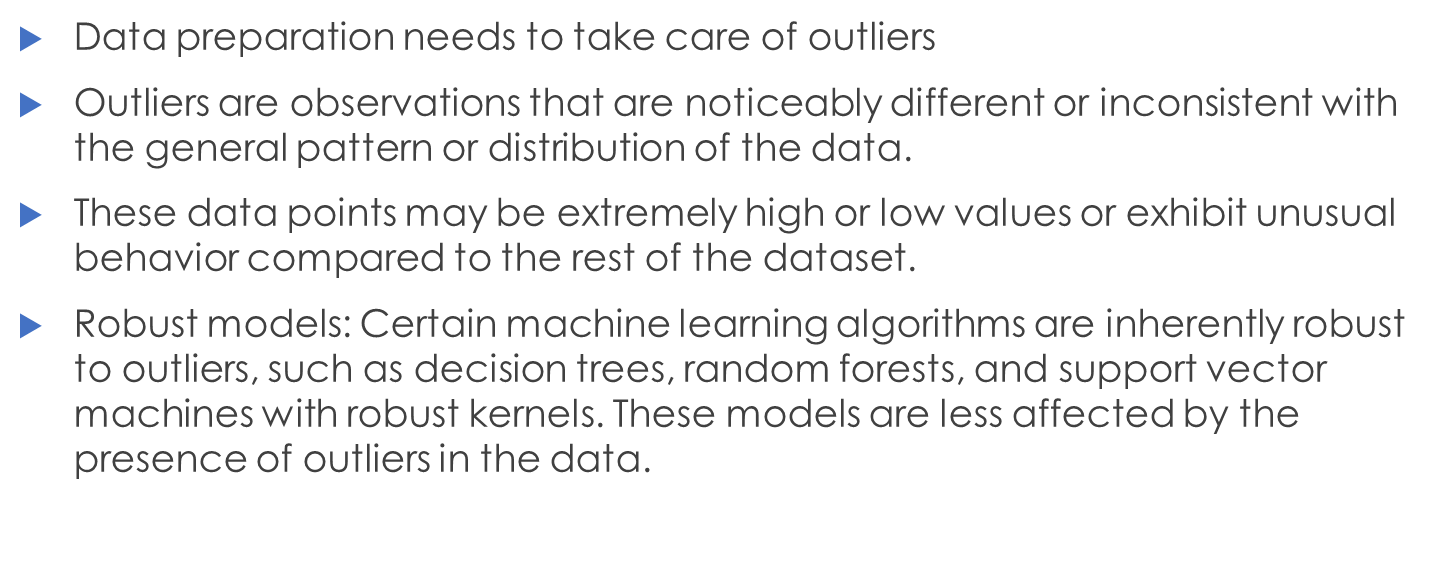
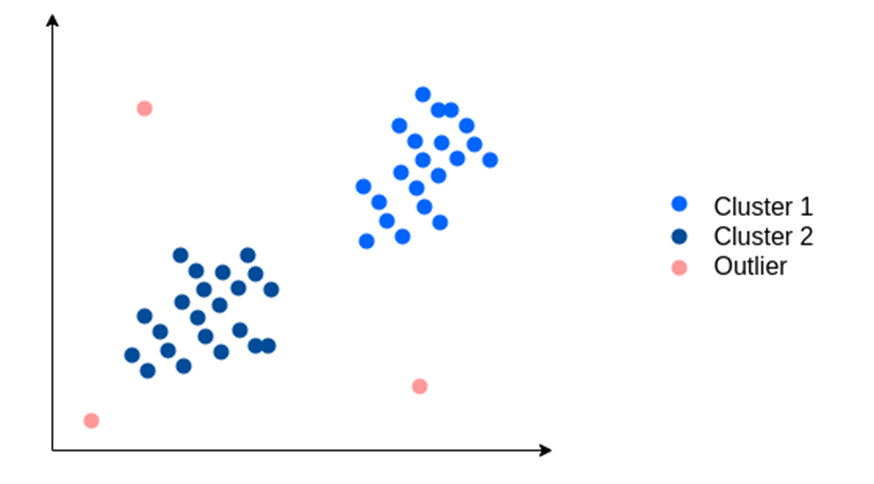
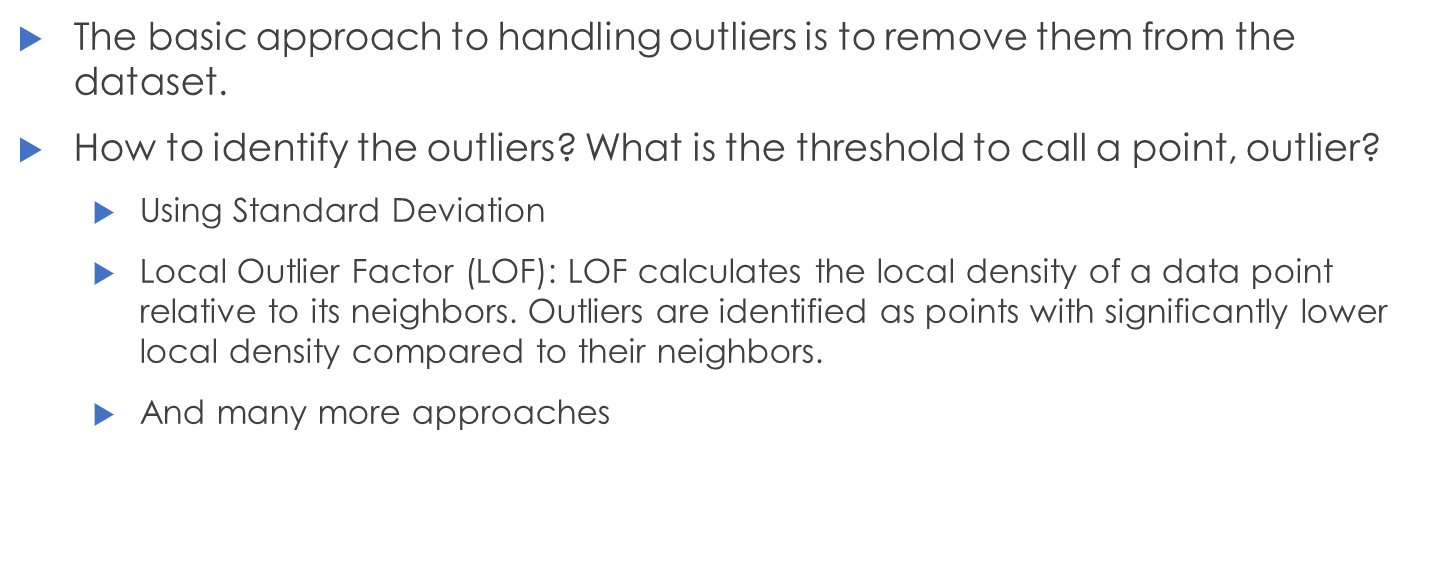

# user session dataset

A JSONL (JSON Lines) file is a text file where each line represents a separate JSON object. JSONL is commonly used for storing and exchanging structured data in a compact and line-based format.

Each line in a JSONL file contains a valid JSON object, which consists of key-value pairs represented in JSON (JavaScript Object Notation) format. Each line is self-contained and independent, allowing for easy parsing and processing of individual JSON objects.

Here's an example of a JSONL file:
{"name": "John", "age": 25, "city": "New York"}
{"name": "Alice", "age": 30, "city": "London"}
{"name": "Bob", "age": 35, "city": "Paris"}

In [1]:
import pandas as pd

In [2]:
session_df = pd.read_json('C:/Users/hussein4/OneDrive - Sheridan College/Desktop/Summer 2024/Advanced Topics in Informatoin Security/Lecture Notes/Week4/test/test.jsonl', lines=True)

In [30]:
session_df.head()

,session,events
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '..."
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':..."
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ..."
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':..."
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ..."


In [3]:
session_df.iloc[0]['events']

[{'aid': 59625, 'ts': 1661724000278, 'type': 'clicks'}]

In [5]:
# Apply json_normalize to extract keys 'aid', 'ts', and 'type' as separate columns
#normalized_df = pd.json_normalize(session_df['events'])
new_df = pd.DataFrame(session_df['events'].apply(lambda x: x[0]).tolist())

session_df1 = pd.concat([session_df, new_df], axis=1)
#session_df = session_df.drop('event', axis=1)

In [4]:
session_df1.head()

NameError: name 'session_df1' is not defined

In [6]:
session_df1['timestamp'] = pd.to_datetime(session_df1['ts'], unit='ms')


In [7]:
session_df1.head()

,session,events,aid,ts,type,timestamp
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '...",59625,1661724000278,clicks,2022-08-28 22:00:00.278
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':...",1142000,1661724000378,clicks,2022-08-28 22:00:00.378
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ...",141736,1661724000559,clicks,2022-08-28 22:00:00.559
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':...",1669402,1661724000568,clicks,2022-08-28 22:00:00.568
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ...",255297,1661724000572,clicks,2022-08-28 22:00:00.572


In [8]:
session_df1['date'] = session_df1['timestamp'].dt.date


In [9]:
session_df1.head()

,session,events,aid,ts,type,timestamp,date
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '...",59625,1661724000278,clicks,2022-08-28 22:00:00.278,2022-08-28
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':...",1142000,1661724000378,clicks,2022-08-28 22:00:00.378,2022-08-28
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ...",141736,1661724000559,clicks,2022-08-28 22:00:00.559,2022-08-28
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':...",1669402,1661724000568,clicks,2022-08-28 22:00:00.568,2022-08-28
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ...",255297,1661724000572,clicks,2022-08-28 22:00:00.572,2022-08-28


In [38]:
session_df1.shape

(1671803, 7)

In [10]:
# To findout number of session per user per day
session_df1.groupby(['aid','date']).count()

session  events  ts  type  timestamp
aid     date                                            
0       2022-09-04        1       1   1     1          1
3       2022-08-29       22      22  22    22         22
        2022-08-30       17      17  17    17         17
        2022-08-31       10      10  10    10         10
        2022-09-01        2       2   2     2          2
...                     ...     ...  ..   ...        ...
1855593 2022-09-02        2       2   2     2          2
        2022-09-03        1       1   1     1          1
1855594 2022-08-30        1       1   1     1          1
        2022-08-31        2       2   2     2          2
        2022-09-04        1       1   1     1          1

[761523 rows x 5 columns]

## Find Outlier by STD

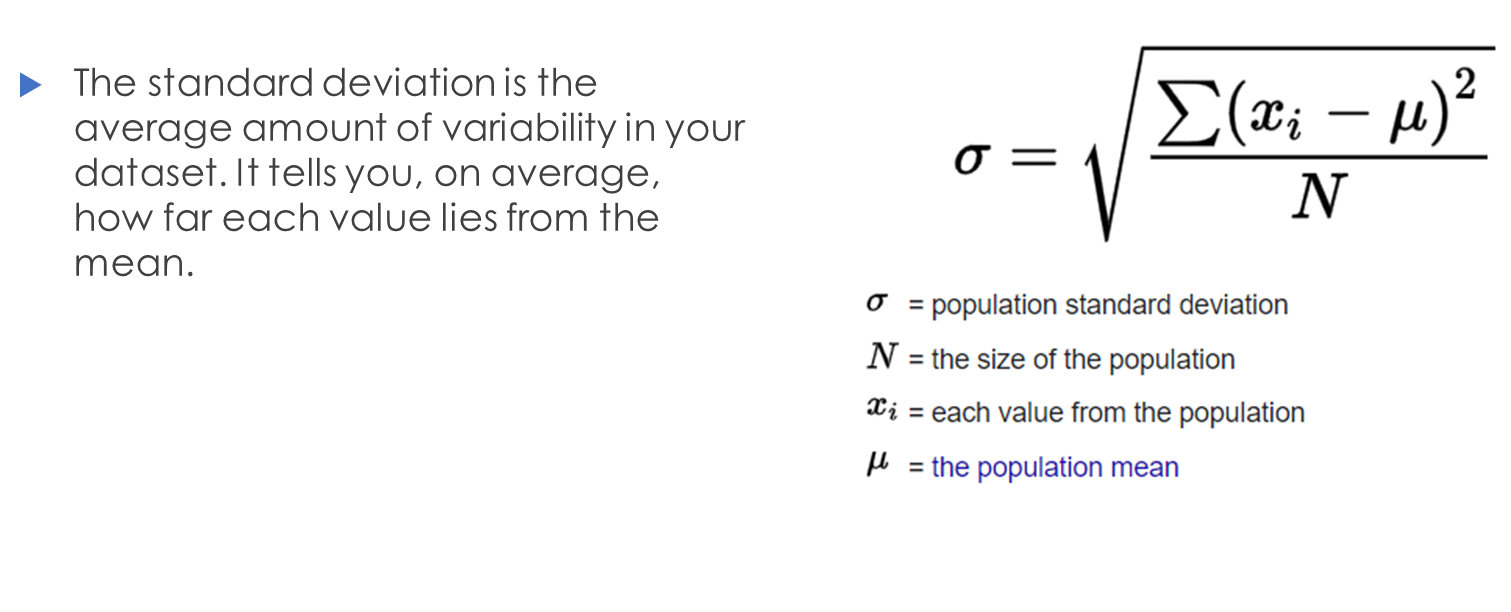
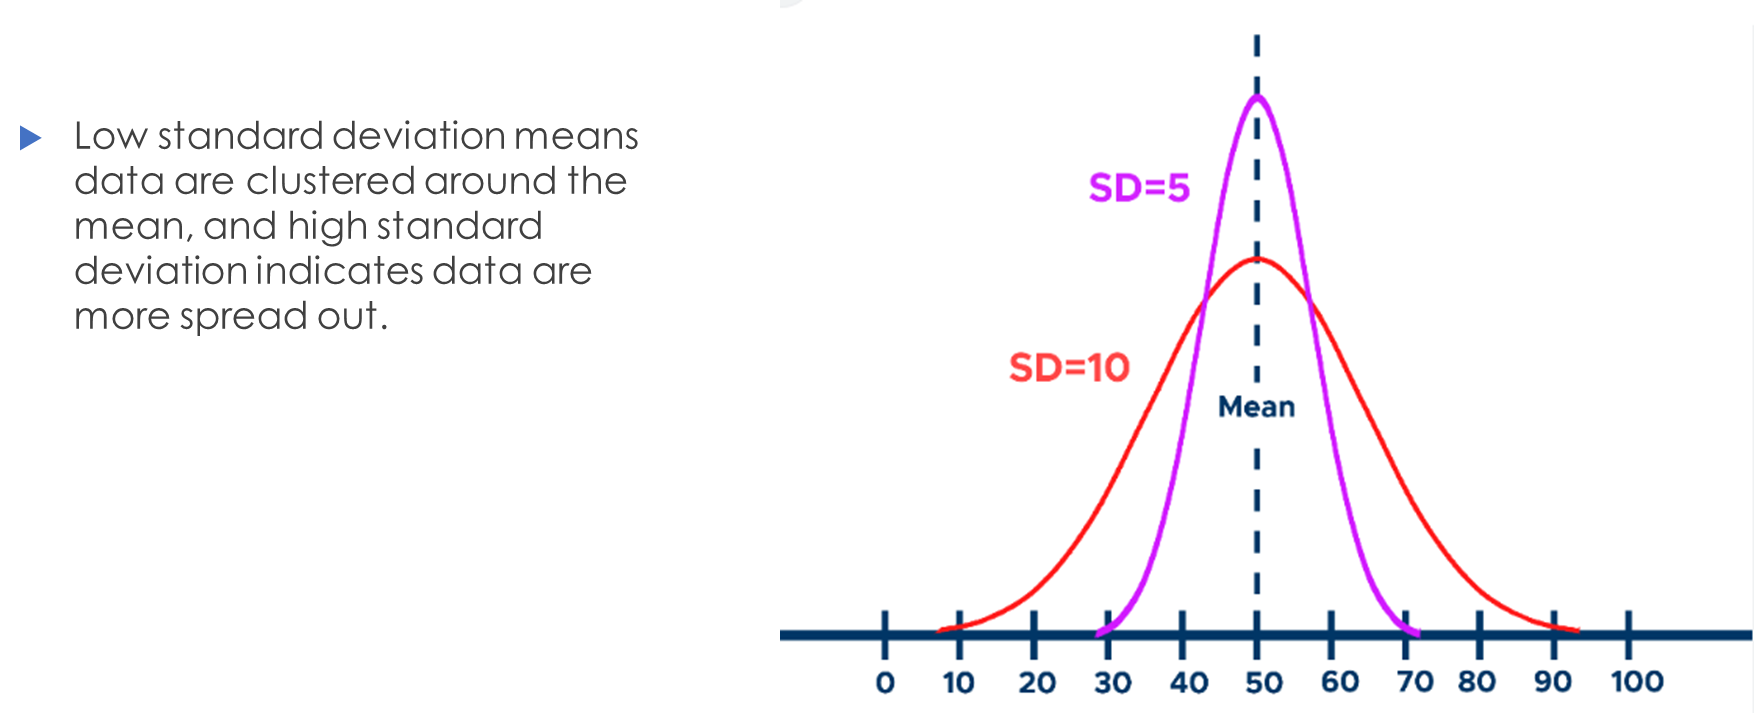
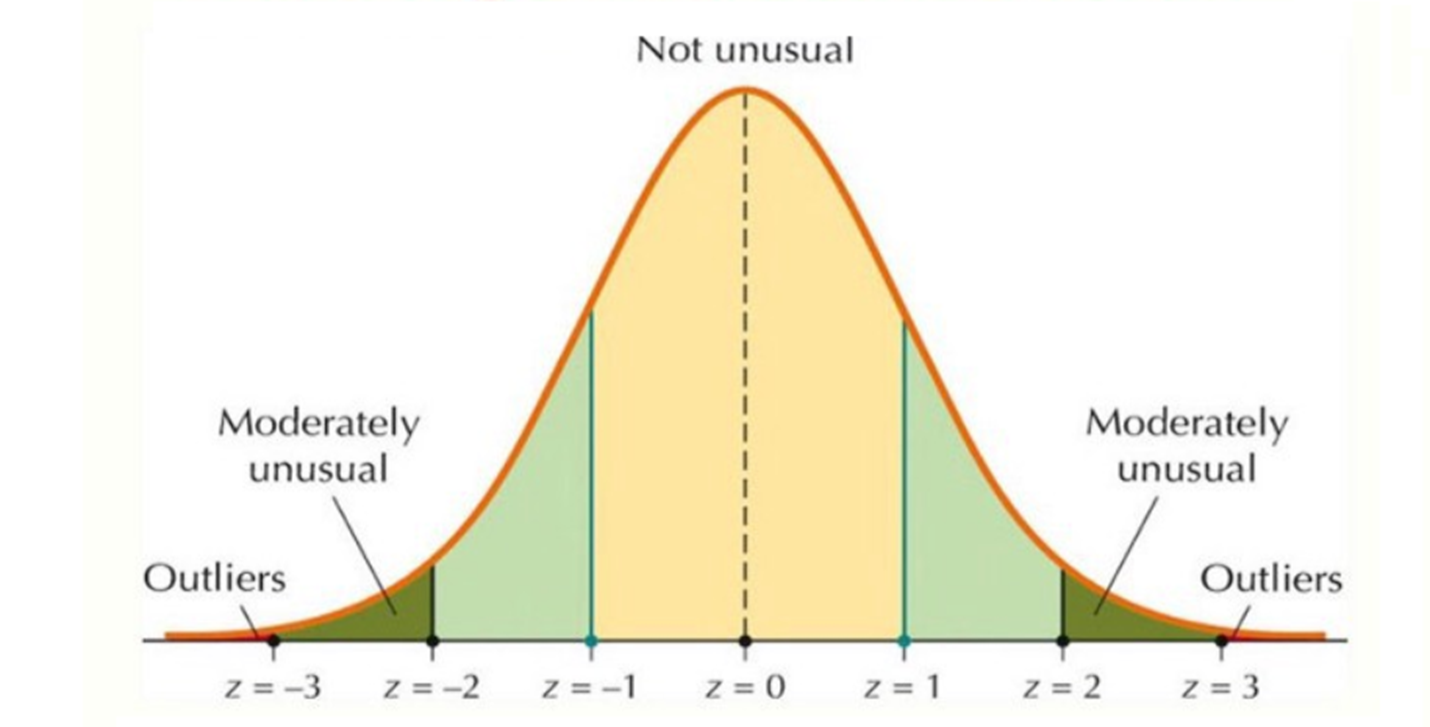

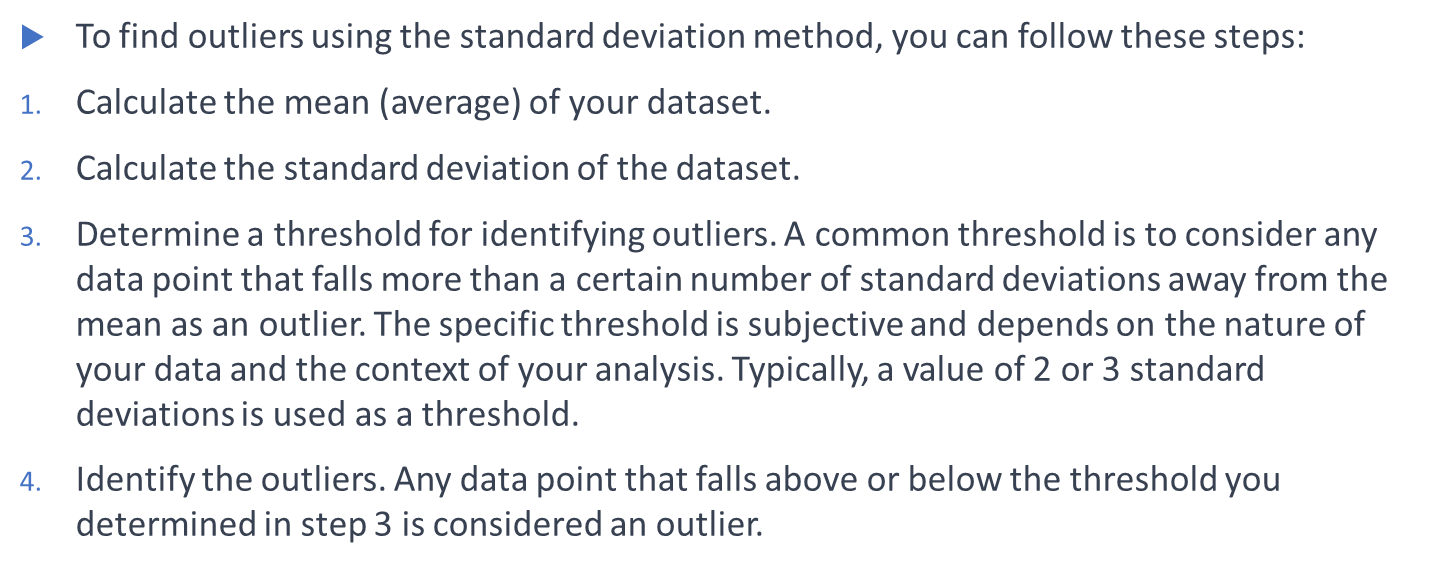

In [40]:
import numpy as np
# Example dataset
data = [2, 4, 6, 8, 10, 12, 14, 16, 1000]

# Finding outliers with a threshold of 2 standard deviations
threshold=2
mean = np.mean(data)
std = np.std(data)
cutoff = threshold * std

outliers = [x for x in data if (x < mean - cutoff) or (x > mean + cutoff)]

print("Mean:", mean)
print("STD:",std)
print("Outliers:", outliers)


Mean: 119.11111111111111
STD: 311.4712201595106
Outliers: [1000]


#### <p style=color:red> Exercise 5: Outliers as Anomalies Outlier detection approaches can be used for anomaly detection in security applications.For example, by monitoring the frequency of user logins and applying the outlier a lgorithm, you can flag potential anomalies that could indicate suspicious or unauthorized activities. In the dataset test.jsonl: 1- Map the column “events” dictionary to a new columns 2- Change the format of the columns ‘ts’ to date 3- Find the number of sessions per day for every user 4- How many records are there in the dataset per user per day session 5- Find the outliers for large number of logins per day 6- How many outlier rows you have find


## Local Outlier Factor

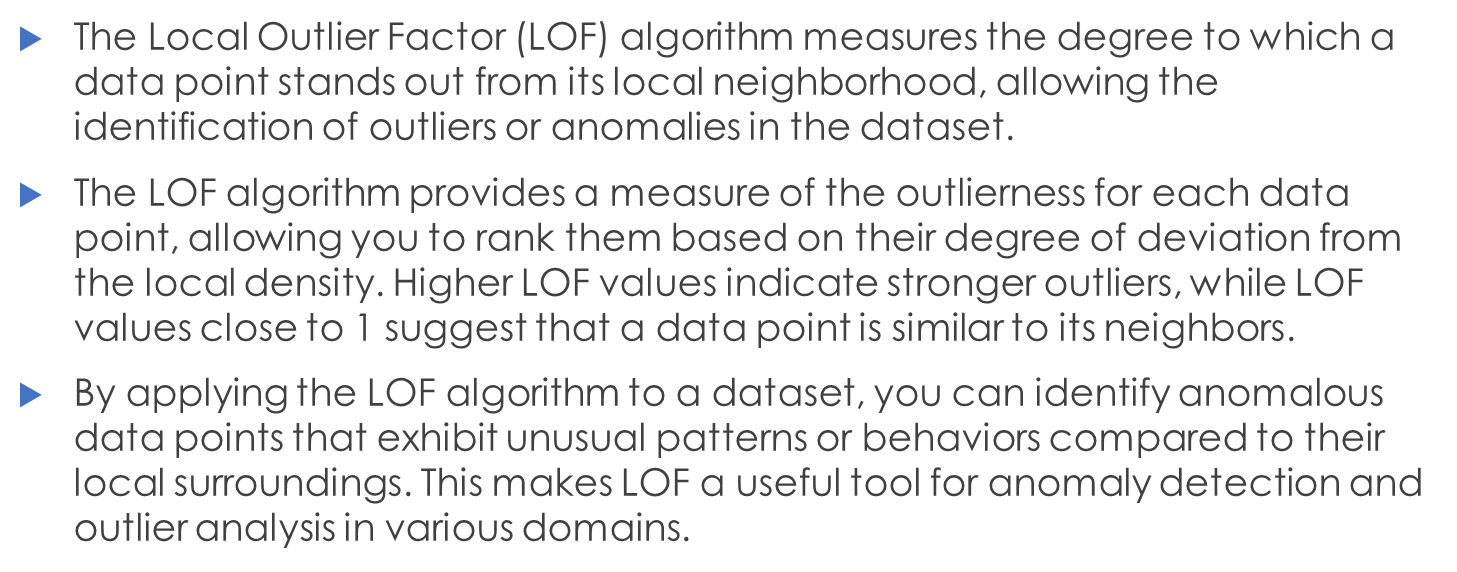

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor


C:\Users\hussein4\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
# Assuming your DataFrame is named 'session_group_df' and the column you want to analyze is named 'session'
# Calculate mean and standard deviation
mean = np.mean(session_group_df['session'])
std = np.std(session_group_df['session'])
threshold = 5  # Number of standard deviations to consider as outliers


In [14]:

# Fit the Local Outlier Factor model
lof_model = LocalOutlierFactor(contamination=0.01)  # Contamination refers to the expected proportion of outliers
outlier_scores = lof_model.fit_predict(session_group_df['session'].values.reshape(-1, 1))


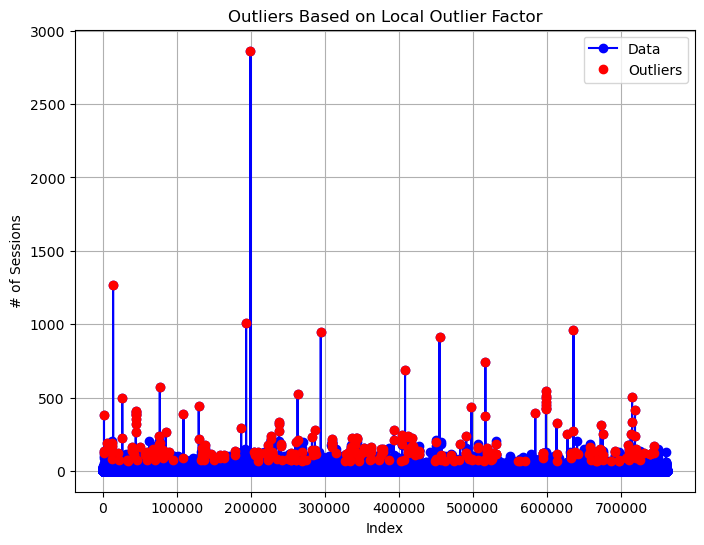

In [15]:

# Create the chart
plt.figure(figsize=(8, 6))
plt.plot(session_group_df.index, session_group_df['session'], 'bo-', label='Data')

# Plot the outliers identified by LOF
outliers = session_group_df[outlier_scores == -1]
plt.plot(outliers.index, outliers['session'], 'ro', label='Outliers')

plt.xlabel('Index')
plt.ylabel('# of Sessions')
plt.title('Outliers Based on Local Outlier Factor')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()


#### <p style=color:red> Exercise 6 Generate the same figure for exercise 5 and compare the two figures for outlier detection based on STD and LOF ! Which one is better at detecting anomalies and why?